# III. Explore the data

This notebook assumes, that notebook 2_get_California_housing_data.ipynb has been successfully executed.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# Ignore all warnings for the purpose of this notebook
import warnings 
warnings.filterwarnings('ignore')

## III.2 Study each attribute

In [3]:
housing = pd.read_csv('../data/train_set.csv', index_col=0)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1862 to 14525
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16344 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


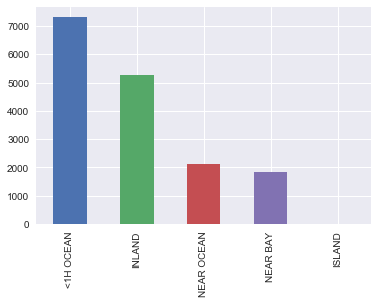

In [4]:
housing.ocean_proximity.value_counts().plot(kind='bar')

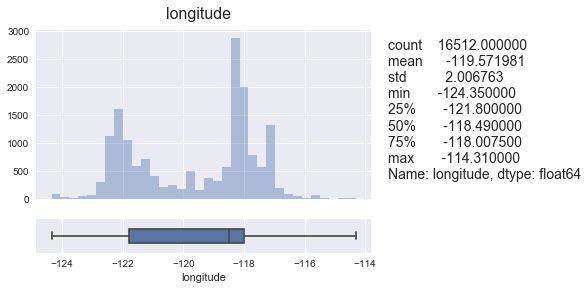

In [5]:
def explore(feature):
    # http://stackoverflow.com/questions/40070093/gridspec-on-seaborn-subplots
    gridkw = dict(height_ratios=[5, 1])
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw=gridkw, sharex=True)
    sns.distplot(feature, ax=ax1, kde=False) #array, top subplot
    sns.boxplot(feature, ax=ax2, width=.4) #bottom subplot
    ax1.set_xlabel('') 
    ax1.text(1.05, 0.95, 
             feature.describe(), 
             transform=ax1.transAxes, fontsize=14,
            verticalalignment='top')
    #http://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
    fig.subplots_adjust(top=0.9)
    fig.suptitle(feature.name, fontsize=16)

explore(housing.longitude)

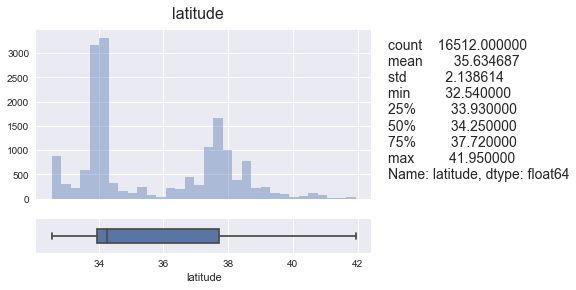

In [6]:
explore(housing['latitude'])

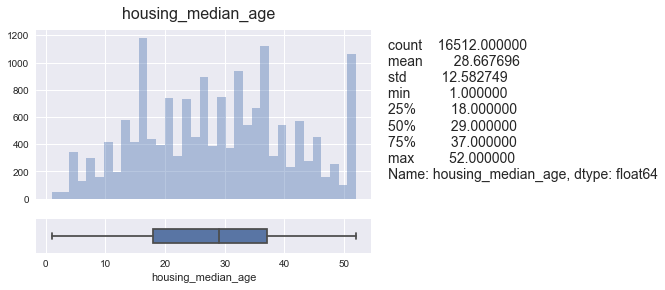

In [7]:
explore(housing['housing_median_age'])

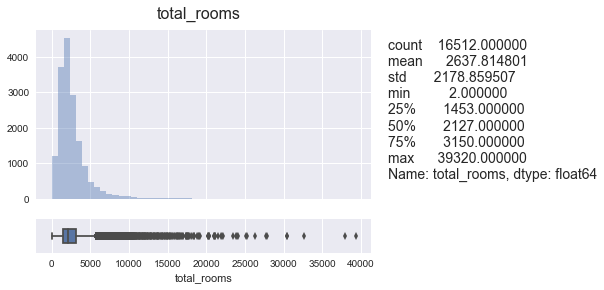

In [8]:
explore(housing['total_rooms'])

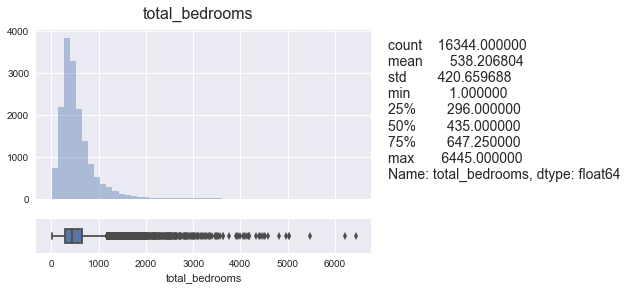

In [9]:
explore(housing['total_bedrooms'].dropna())

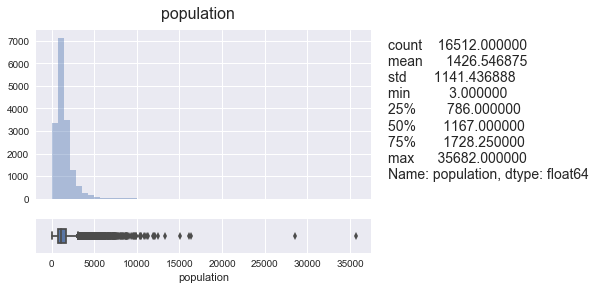

In [10]:
explore(housing['population'])

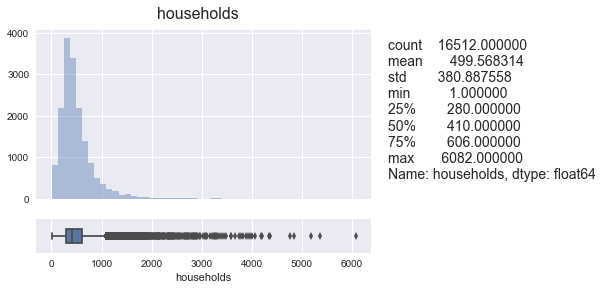

In [11]:
explore(housing['households'])

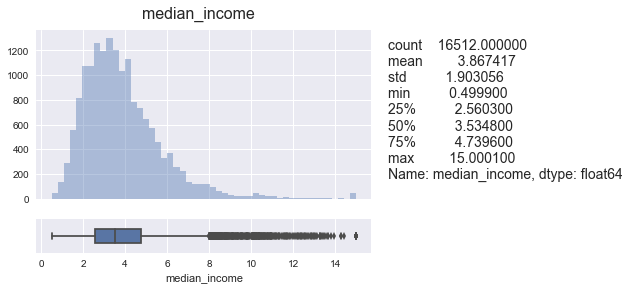

In [12]:
explore(housing['median_income']) 

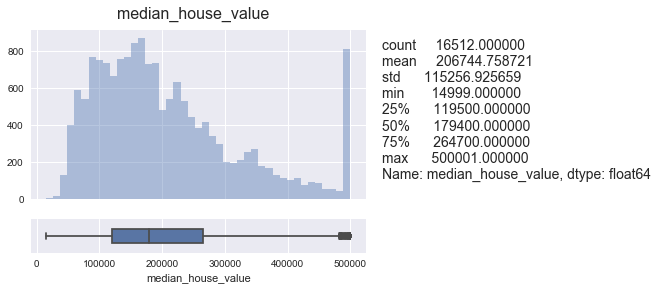

In [13]:
explore(housing['median_house_value']) 

## Visualize the data

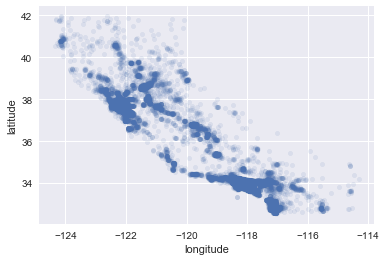

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

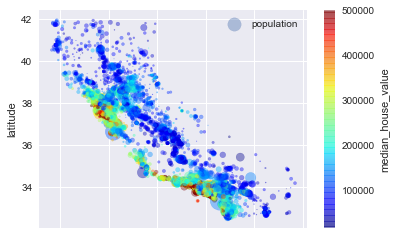

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), 
             colorbar=True)
plt.legend()

## Study the correlations between attributes.

In [16]:
# compute the standard correlation coefficient (also called Pearson’s r)
corr_matrix = housing.corr()

In [17]:
# look at how much each attribute correlates with the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691691
total_rooms           0.131758
housing_median_age    0.104311
households            0.062524
total_bedrooms        0.044894
population           -0.027218
longitude            -0.042825
latitude             -0.147224
Name: median_house_value, dtype: float64

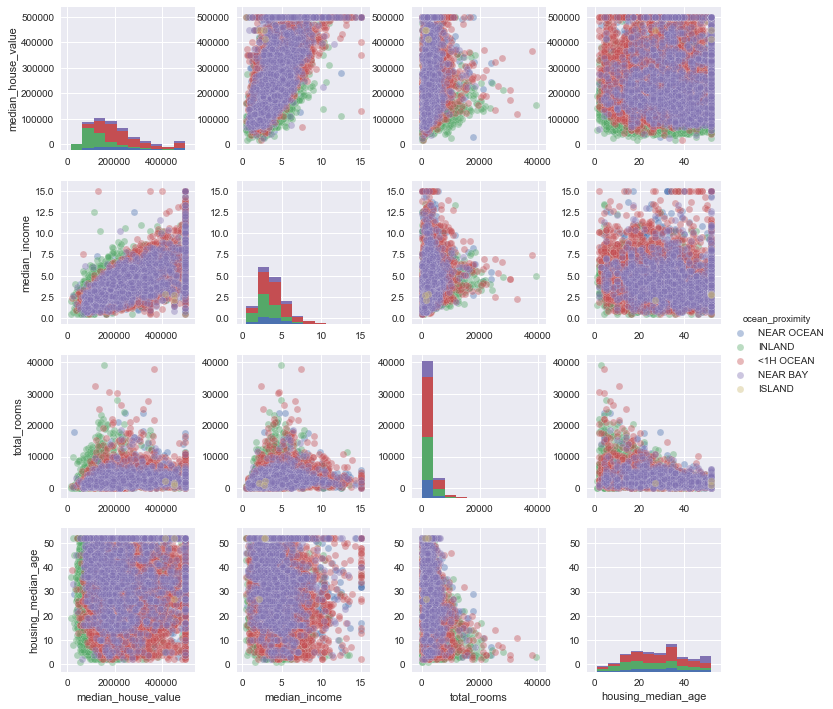

In [18]:
sns.pairplot(housing[["median_house_value", "median_income", 
                      "total_rooms", "housing_median_age","ocean_proximity"]],
            hue="ocean_proximity",
            plot_kws= { "alpha":0.4})

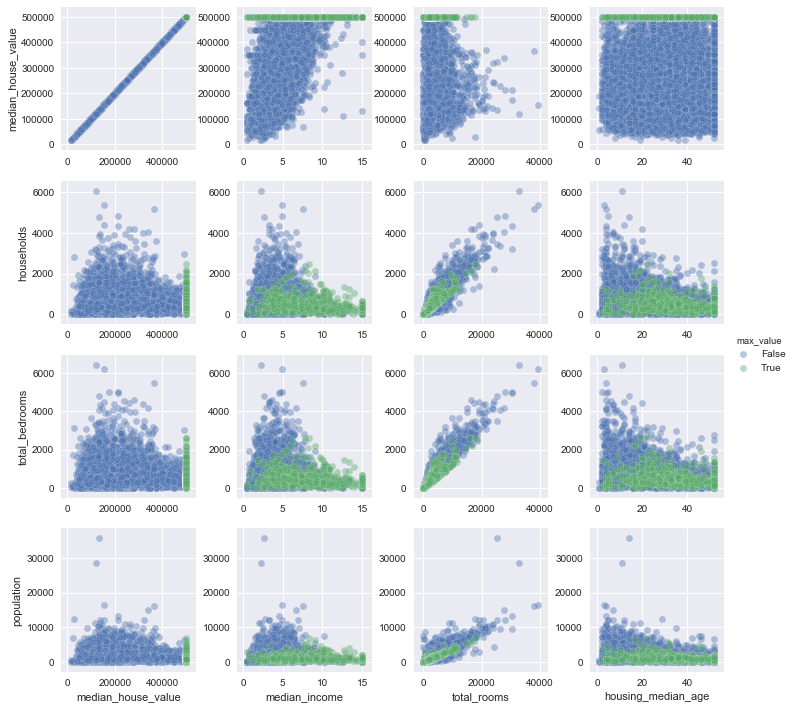

In [19]:
housing["max_value"] = housing["median_house_value"] == housing["median_house_value"].max()
sns.pairplot(housing,
             x_vars=["median_house_value", "median_income", "total_rooms", "housing_median_age"],
             y_vars=["median_house_value", "households", "total_bedrooms", "population"],
            hue="max_value", plot_kws= { "alpha":0.4})

In [20]:
del housing["max_value"]

## Feature Engineering

In [21]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691691
rooms_per_household         0.145217
total_rooms                 0.131758
housing_median_age          0.104311
households                  0.062524
total_bedrooms              0.044894
population_per_household   -0.021893
population                 -0.027218
longitude                  -0.042825
latitude                   -0.147224
bedrooms_per_room          -0.263606
Name: median_house_value, dtype: float64

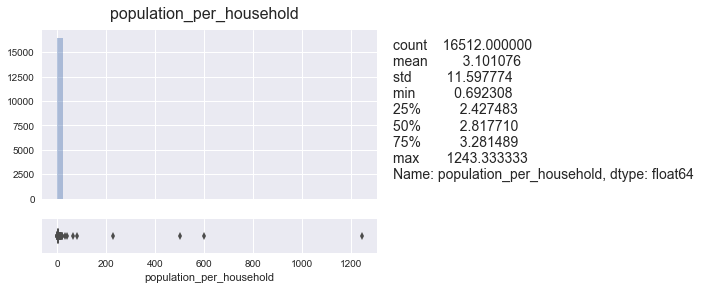

In [23]:
explore(housing["population_per_household"])

In [24]:
housing["log_population_per_household"] = np.log(housing["population_per_household"])

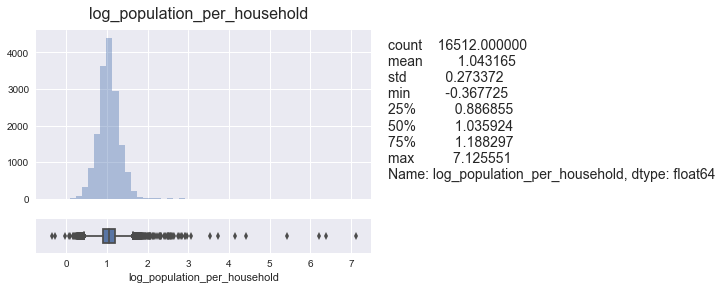

In [25]:
explore(housing["log_population_per_household"])

In [26]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value              1.000000
median_income                   0.691691
rooms_per_household             0.145217
total_rooms                     0.131758
housing_median_age              0.104311
households                      0.062524
total_bedrooms                  0.044894
population_per_household       -0.021893
population                     -0.027218
longitude                      -0.042825
latitude                       -0.147224
log_population_per_household   -0.250273
bedrooms_per_room              -0.263606
Name: median_house_value, dtype: float64